![Twitter Sentiment Analysis](tt4.png)

# Twitter Sentiment Analysis

With the large amount of data generated by users on social networks, social network monitoring techniques have become increasingly relevant. In this context, natural language processing (NLP) techniques have become essential to extract relevant information from this unstructured data.

This project aims to use NLP techniques to analyze sentiments in tweets using Gensim Word2Vec for text vectorization and the logistic regression algorithm from the sklearn library for sentiment classification into negative or positive.

The word2vec algorithm uses a neural network model to learn word associations from a large corpus of text. It is capable of capturing semantic relationships between words, which allows for superior performance in classification.

It is expected that the results obtained can contribute to the understanding of the sentiments expressed by Twitter users regarding certain topics and events.

This project has been divided into three notebooks:<br>
The first notebook concerns data visualization and cleaning.<br>
The second notebook concerns training of the word2vec and logistic regression models.<br>
The third notebook uses the previously trained models for classifying tweets extracted using the Twitter API and the tweepy library.

---

### [About Sentiment140 dataset](https://www.kaggle.com/datasets/kazanova/sentiment140?datasetId=2477&sortBy=voteCount)



The dataset used in this project was obtained from [Kaggle](https://www.kaggle.com/datasets/kazanova/sentiment140?datasetId=2477&sortBy=voteCount). It contains 1.6 million tweets classified as negative or positive.

| Column | Description |
|:---------------------:|:-------------:|
| target              | The polarity of the tweet (0 = negative, 2 = neutral, 4 = positive) |
| ids                 | The ID of the tweet (example: 2087) |
| date                | The date of the tweet (example: Sat May 16 23:58:44 UTC 2009) |
| flag                | The query (example: lyx). If there is no query, then this value is NO_QUERY |
| user                | The user who tweeted (example: robotickilldozr) |
| text                | The text of the tweet (example: Lyx is cool) |


---

## Importing Libs

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk import tokenize

%matplotlib inline

***

## Data Loading and Exploratory Data Analysis (EDA)


In [3]:
tweets = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='ISO-8859-1', names=["target", "ids", "date", "flag", "user", "text"])
tweets.head()

FileNotFoundError: [Errno 2] No such file or directory: 'training.1600000.processed.noemoticon.csv'

In [5]:
tweets.drop(['ids','date','flag','user'],axis=1, inplace=True)
tweets['target'] = tweets['target'].replace(4,1)
tweets

target                                               text
0             0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1             0  is upset that he can't update his Facebook by ...
2             0  @Kenichan I dived many times for the ball. Man...
3             0    my whole body feels itchy and like its on fire 
4             0  @nationwideclass no, it's not behaving at all....
...         ...                                                ...
1599995       4  Just woke up. Having no school is the best fee...
1599996       4  TheWDB.com - Very cool to hear old Walt interv...
1599997       4  Are you ready for your MoJo Makeover? Ask me f...
1599998       4  Happy 38th Birthday to my boo of alll time!!! ...
1599999       4  happy #charitytuesday @theNSPCC @SparksCharity...

[1600000 rows x 2 columns]

In [3]:
negative_tweets = tweets[tweets['target'] == 0]
negative_tweets['text'].head()

0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object

In [4]:
positive_tweets = tweets[tweets['target'] == 4]
positive_tweets['text'].head()

800000         I LOVE @Health4UandPets u guys r the best!! 
800001    im meeting up with one of my besties tonight! ...
800002    @DaRealSunisaKim Thanks for the Twitter add, S...
800003    Being sick can be really cheap when it hurts t...
800004      @LovesBrooklyn2 he has that effect on everyone 
Name: text, dtype: object

In [6]:
t_gp = tweets.groupby('target')
t_gp.size()

target
0    800000
4    800000
dtype: int64

### Changing target column

In [8]:
t_gp = tweets.groupby('target')
t_gp.size()

target
0    800000
1    800000
dtype: int64

***

## Data visualization before cleaning

In [9]:
def plot_wc(dataframe, column, title):
    words = ' '.join([text for text in dataframe[column]])
    wc = WordCloud(width=800, height=400, max_font_size=100).generate(words)
    plt.rcParams['figure.figsize'] = [18, 23]
    plt.title(title, fontsize=40)
    plt.axis('off');
    plt.imshow(wc);

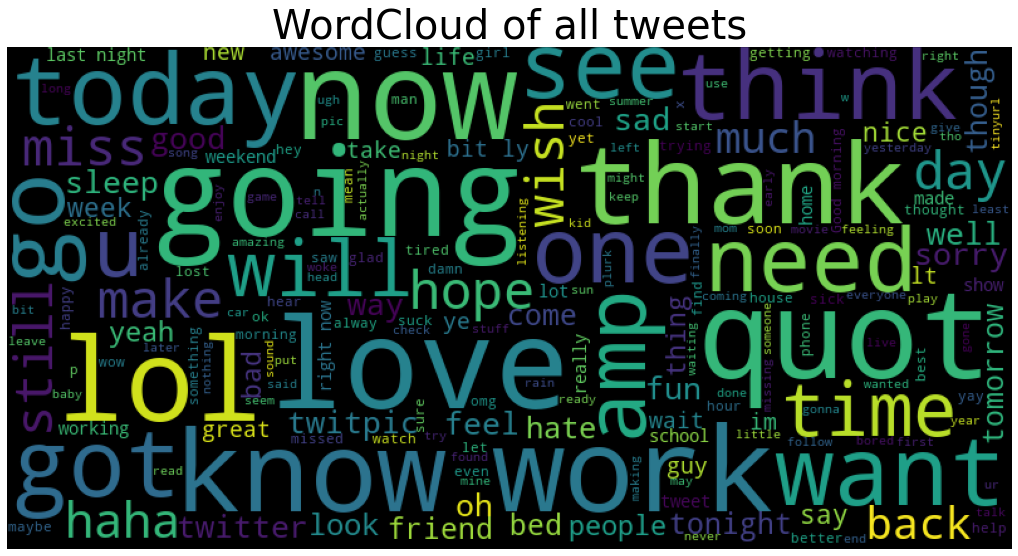

In [10]:
plot_wc(tweets, 'text', 'WordCloud of all tweets')

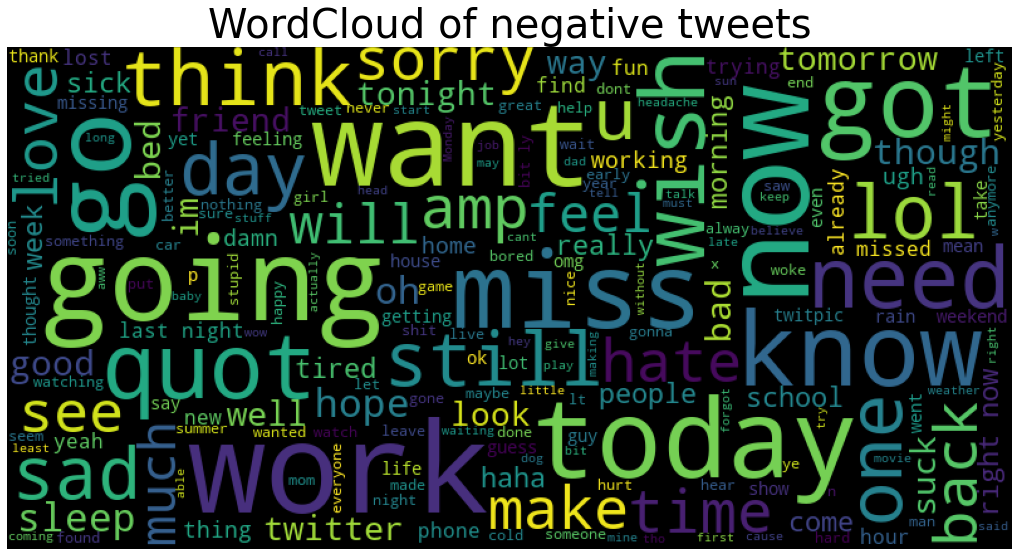

In [11]:
plot_wc(negative_tweets, 'text', 'WordCloud of negative tweets')

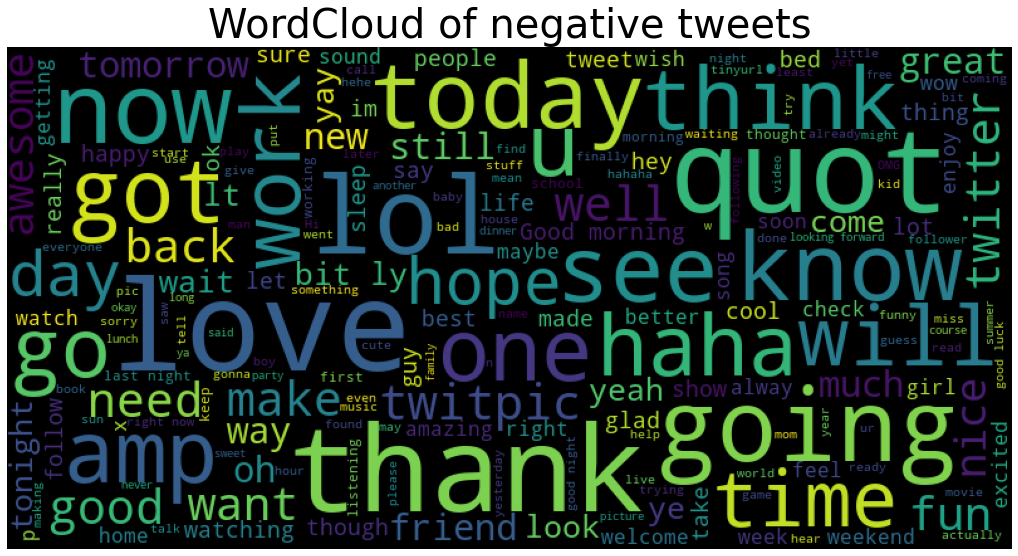

In [12]:
plot_wc(positive_tweets, 'text', 'WordCloud of negative tweets')

In [13]:
def barplot (dataframe, column, title):
    words = ' '.join([text for text in dataframe[column]])
    ws_tokenizer = tokenize.WhitespaceTokenizer()
    tokens = ws_tokenizer.tokenize(words)
    freq = nltk.FreqDist(tokens)
    
    df_freq = pd.DataFrame({'Word': list(freq.keys()), 'Frequency': list(freq.values())})
    top_25 = df_freq.nlargest(columns = 'Frequency', n=25)
    
    plt.figure(figsize=(18,10))
    ax = sns.barplot (data = top_25, x='Word', y='Frequency', color='dodgerblue');
    ax.set_title(title, fontsize=24);

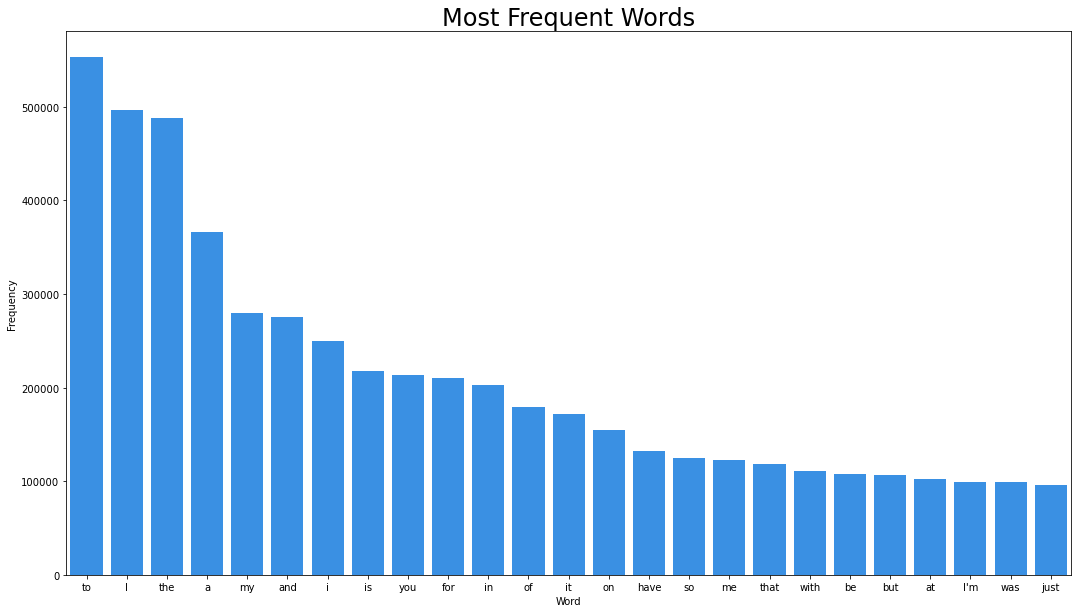

In [14]:
barplot(tweets, 'text', 'Most Frequent Words')

***

## Cleaning Data

### Removing stop-words

In [15]:
stop_words = nltk.corpus.stopwords.words("english")

In [16]:
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [17]:
ws_tokenizer = tokenize.WhitespaceTokenizer()
new_tweets = []

for tweet in tweets.text:
    ntweet = list()
    words = ws_tokenizer.tokenize(tweet)
    for word in words:
        if (word.lower() not in stop_words) and (word.lower().startswith("http")==False) and (word.lower().startswith("&")==False):
            ntweet.append(word.lower())
    new_tweets.append(' '.join(ntweet))
    
tweets['text2'] = new_tweets

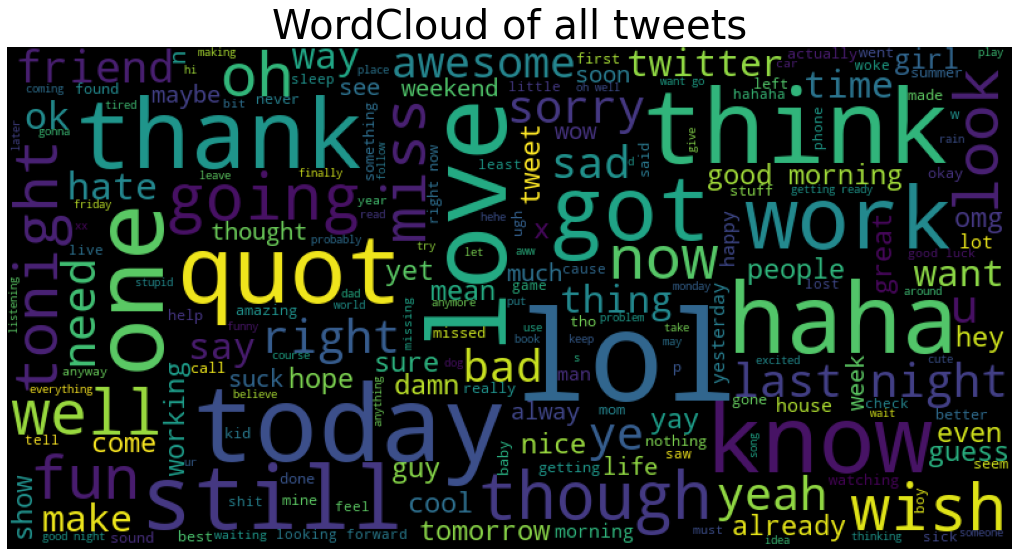

In [18]:
plot_wc(tweets, 'text2', 'WordCloud of all tweets')

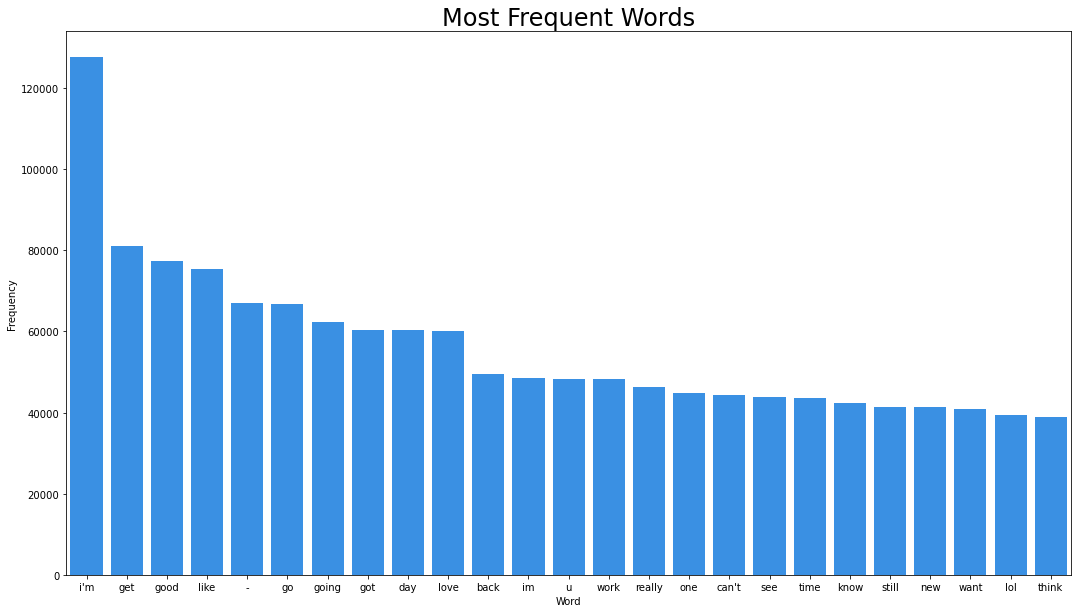

In [19]:
barplot(tweets, 'text2', 'Most Frequent Words')

### Removing punctuation

In [20]:
#creating a list with all punctuations
from string import punctuation
    
punc_lst = []

for p in punctuation:
    punc_lst.append(p)

In [21]:
punc_tokenizer = tokenize.WordPunctTokenizer()
stop_words2 = stop_words + punc_lst
new_tweets = []

for tweet in tweets.text2:
    ntweet = list()
    words = punc_tokenizer.tokenize(tweet)
    for word in words:
        if word not in stop_words2:
            ntweet.append(word)
    new_tweets.append(' '.join(ntweet))
    
tweets['text3'] = new_tweets

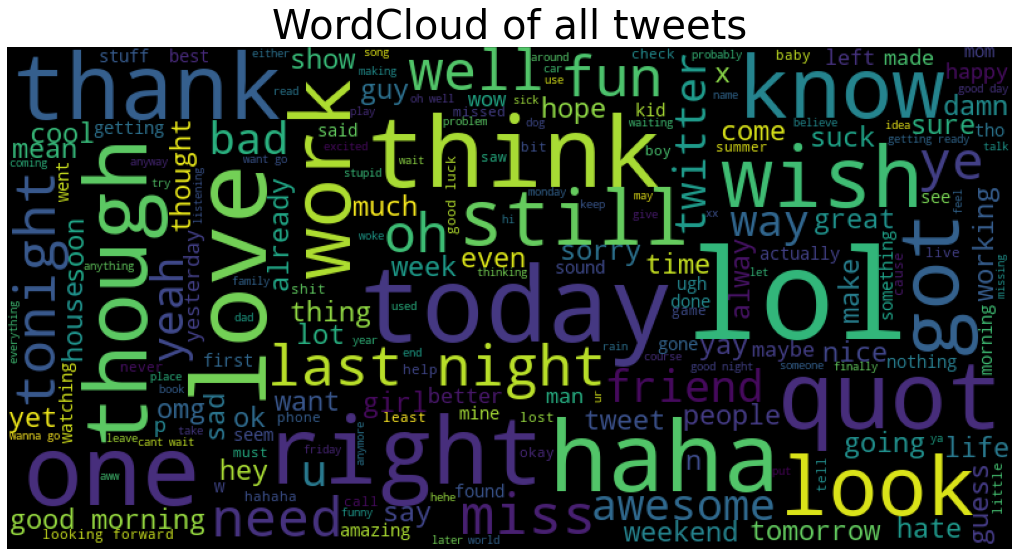

In [22]:
plot_wc(tweets, 'text3', 'WordCloud of all tweets')

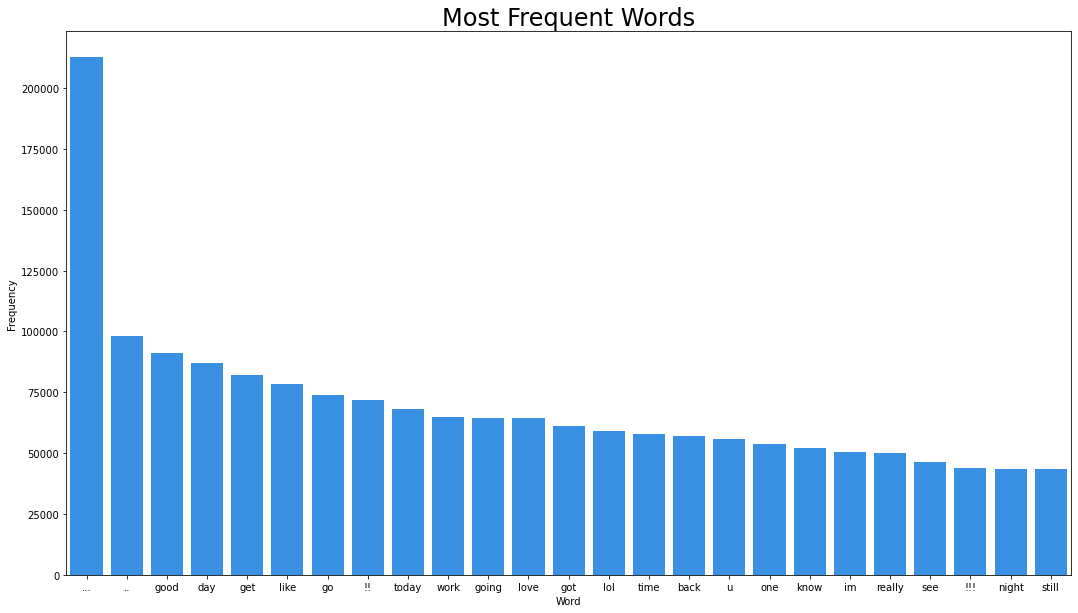

In [23]:
barplot(tweets, 'text3', 'Most Frequent Words')

### Removing accentuation

In [24]:
import unidecode

tweets['text4'] = [unidecode.unidecode(text) for text in tweets.text3]
stop_words3 = [unidecode.unidecode(text) for text in stop_words2]

new_tweets = []

for tweet in tweets.text4:
    ntweet = list()
    words = punc_tokenizer.tokenize(tweet)
    for word in words:
        if word not in stop_words3:
            ntweet.append(word)
    new_tweets.append(' '.join(ntweet))
    
tweets['text4'] = new_tweets

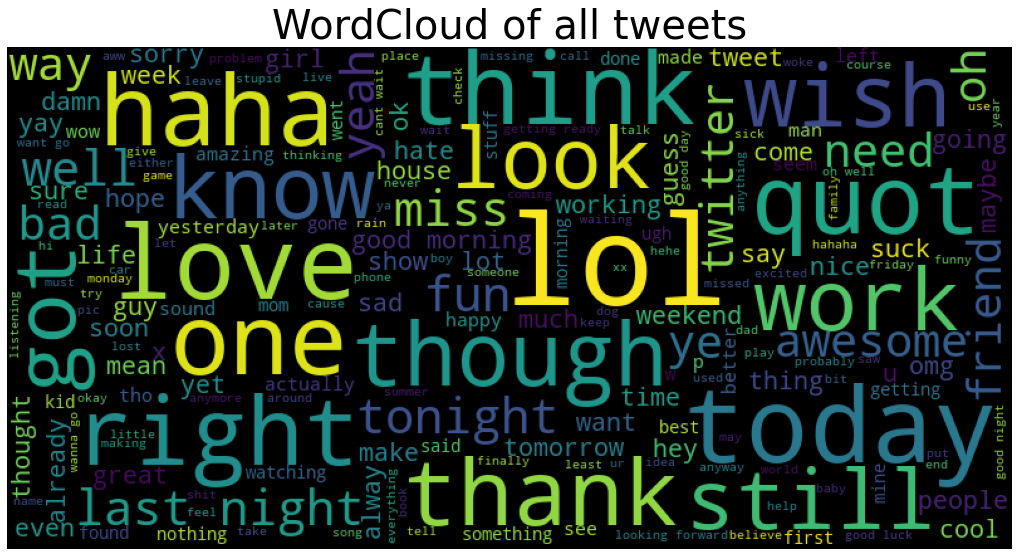

In [25]:
plot_wc(tweets, 'text4', 'WordCloud of all tweets')

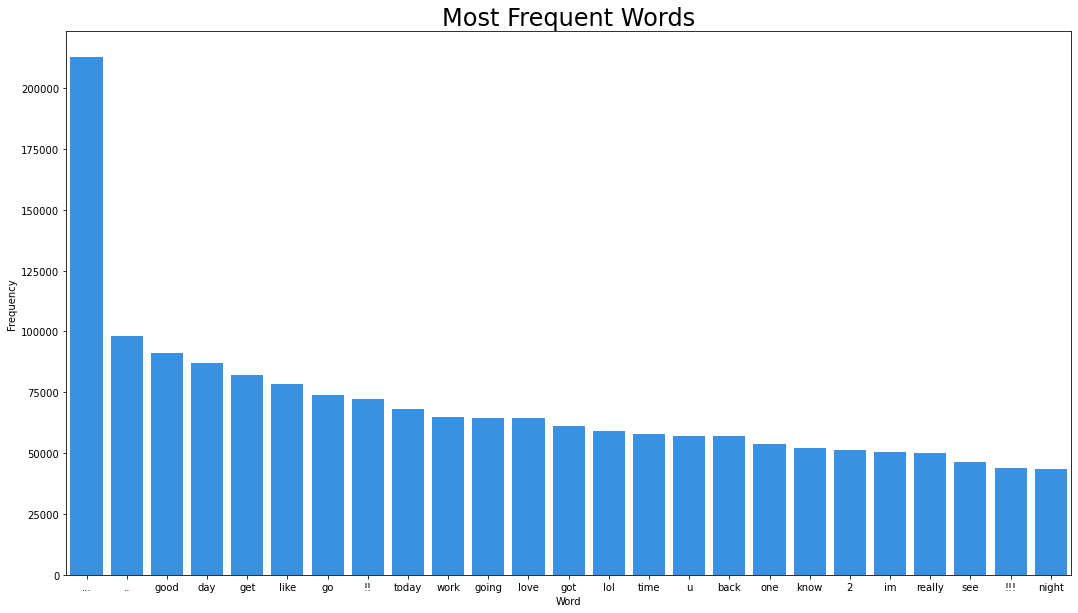

In [26]:
barplot(tweets, 'text4', 'Most Frequent Words')

### Stemming

In [27]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

new_tweets = []

for tweet in tweets.text4:
    ntweet = list()
    words = punc_tokenizer.tokenize(tweet)
    for word in words:
        if word not in stop_words3:
            ntweet.append(porter.stem(word))
    new_tweets.append(' '.join(ntweet))
    
tweets['text5'] = new_tweets

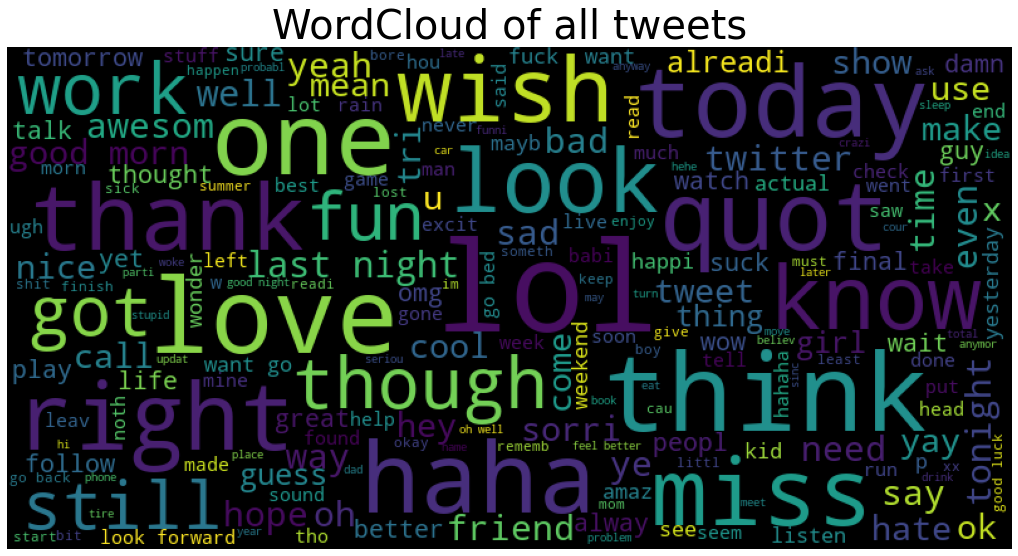

In [28]:
plot_wc(tweets, 'text5', 'WordCloud of all tweets')

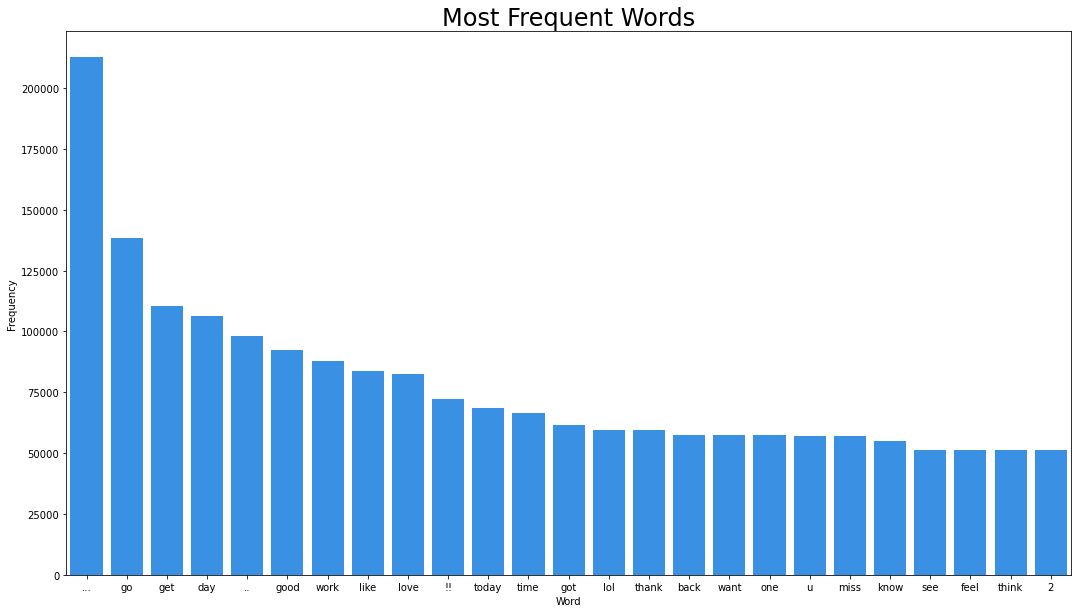

In [29]:
barplot(tweets, 'text5', 'Most Frequent Words')

### Removing all words that have characters different from alphabet letters (a-z).

In [30]:
new_tweets = []

for tweet in tweets.text5:
    ntweet = list()
    words = ws_tokenizer.tokenize(tweet)
    for word in words:
        if word.isalpha() and word!='quot':
            ntweet.append(word)
    new_tweets.append(' '.join(ntweet))
    
tweets['text6'] = new_tweets

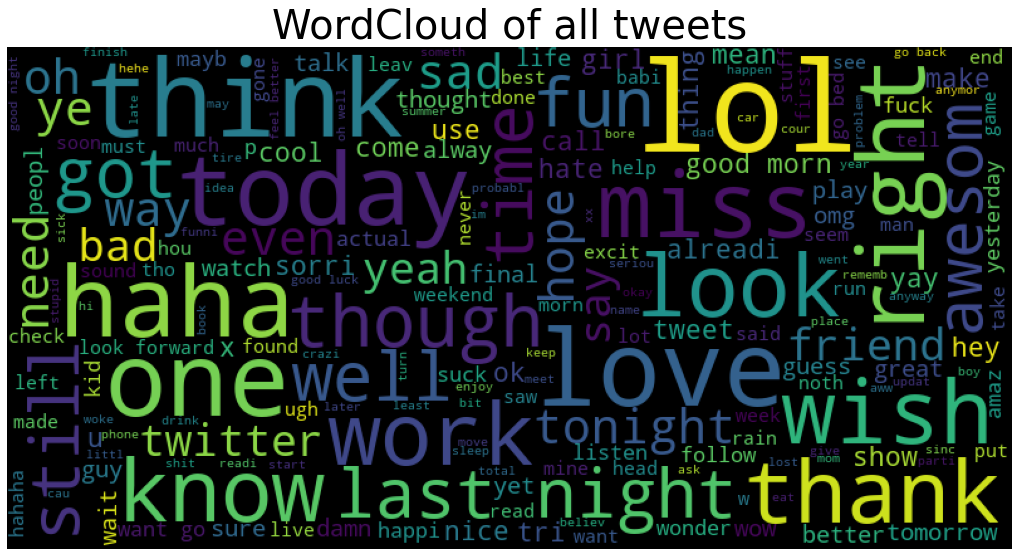

In [31]:
plot_wc(tweets, 'text6', 'WordCloud of all tweets')

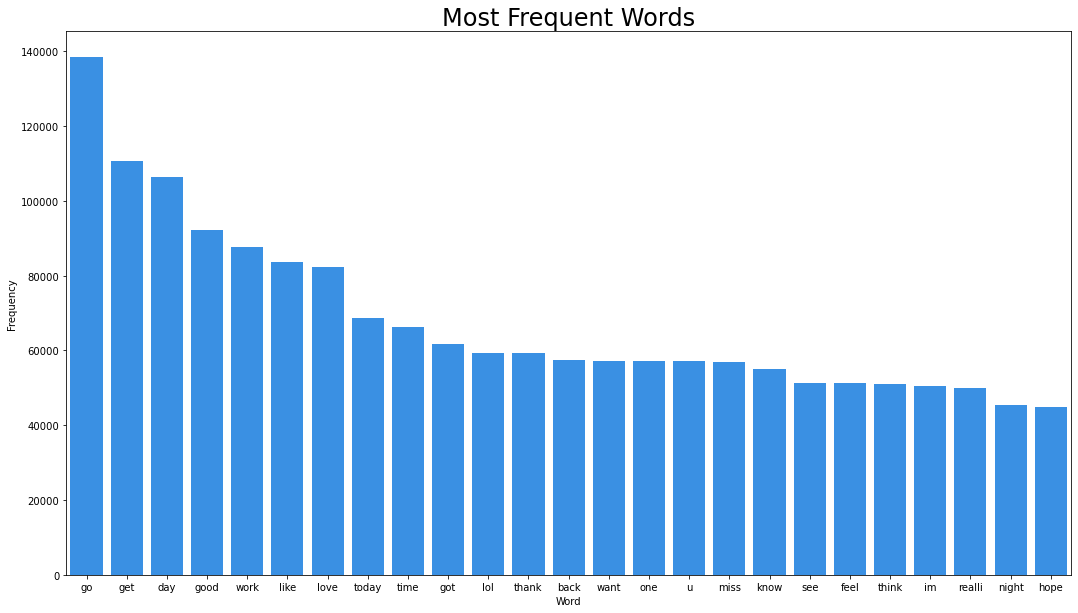

In [32]:
barplot(tweets, 'text6', 'Most Frequent Words')

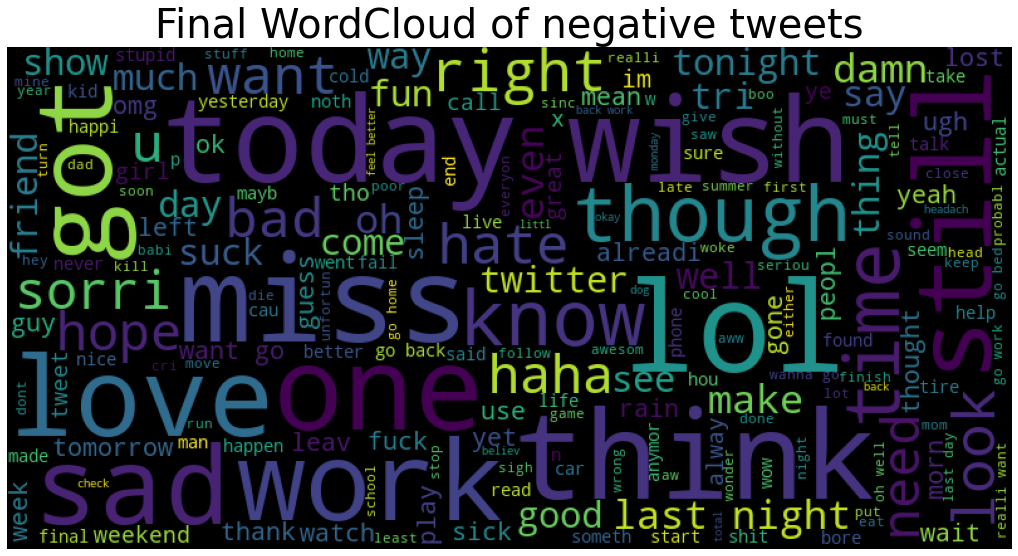

In [33]:
negative_tweets = tweets[tweets['target'] == 0]
plot_wc(negative_tweets, 'text6', 'Final WordCloud of negative tweets')

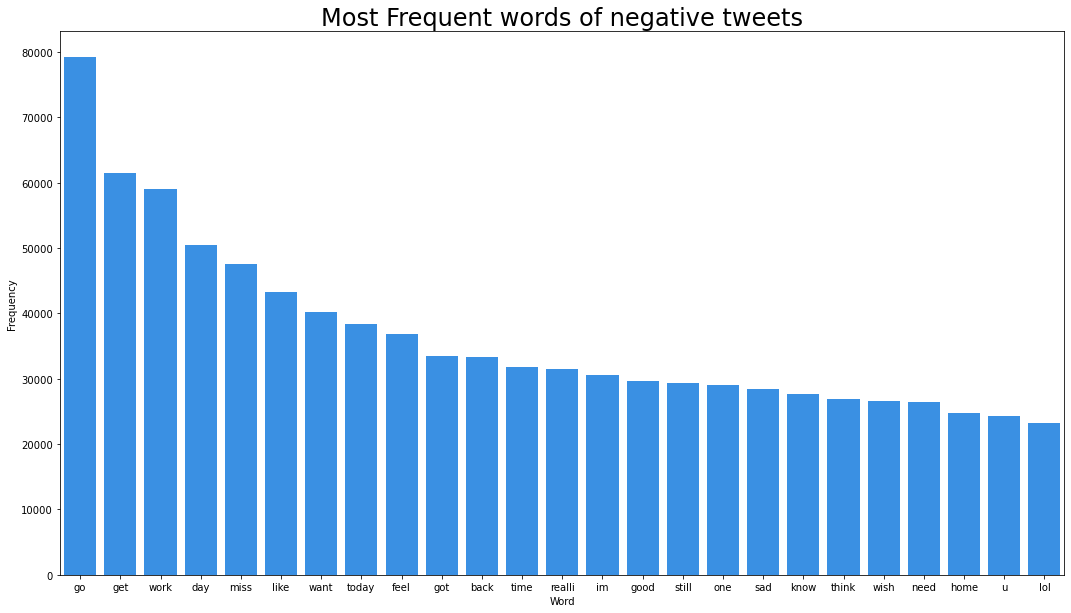

In [34]:
barplot(negative_tweets, 'text6', 'Most Frequent words of negative tweets')

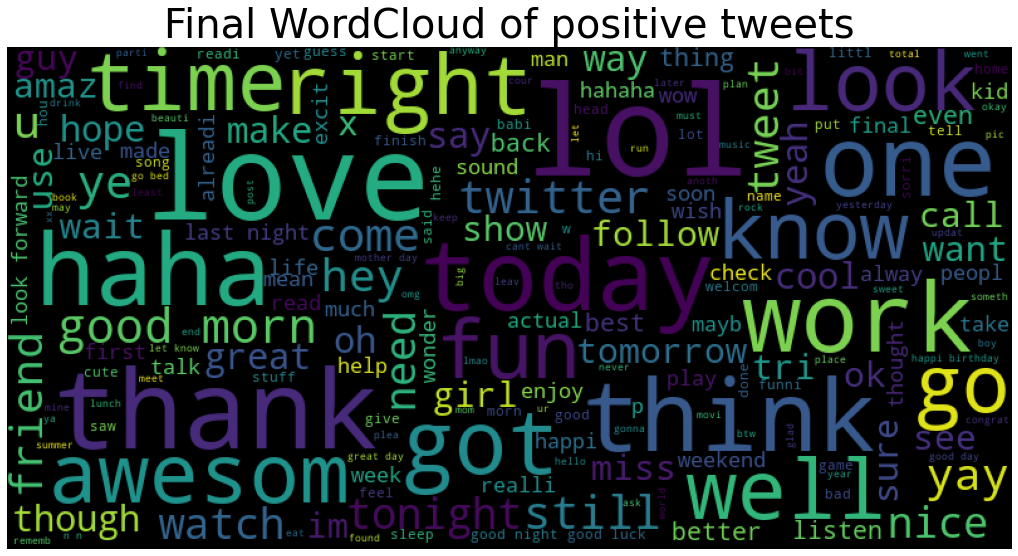

In [35]:
positive_tweets = tweets[tweets['target'] == 1]
plot_wc(positive_tweets, 'text6', 'Final WordCloud of positive tweets')

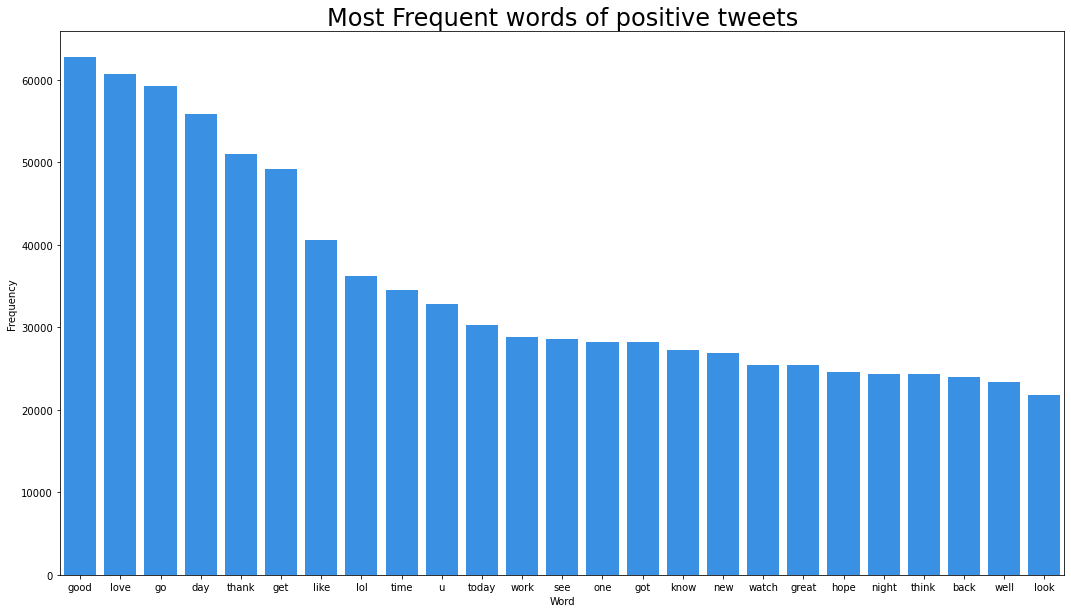

In [36]:
barplot(positive_tweets, 'text6', 'Most Frequent words of positive tweets')

### Printing the 250 most frequent words.

In [37]:
words = ' '.join([text for text in tweets['text6']])
ws_tokenizer = tokenize.WhitespaceTokenizer()
tokens = ws_tokenizer.tokenize(words)
freq = nltk.FreqDist(tokens)
df_freq = pd.DataFrame({'Word': list(freq.keys()), 'Frequency': list(freq.values())})
top_250 = df_freq.nlargest(columns = 'Frequency', n=500)
top_250.reset_index(drop=True, inplace=True)
top_250['Word']

for i in range(500):
    print(' ' + str(top_250.iloc[i]['Word']), end='')

 go get day good work like love today time got lol thank back want one u miss know see feel think im realli night hope watch still need make well new home look oh come much last twitter morn tomorrow wish great wait sleep haha sad fun tri week right follow happi would bad thing sorri tonight friend say way take nice though gonna better hate even yeah bed tweet could start school peopl show hour guy play weekend hey final ye awesom next let use dont never soon n cant tire long rain pleas littl first everyon year movi wanna best sick life ok find girl call suck sure done help bore head alway talk x alreadi keep cool lot anoth someth live us phone eat leav read man hurt readi made yay enjoy song yet hous went ur sound ever thought pretti mayb excit away finish summer game amaz omg guess tell old damn mean earli listen bit someon check left babi lost give end parti late wow big noth hear hot ya actual birthday pic happen glad sun also stop weather later two wonder mom stuff w ugh put saw r

## Saving the dataset in CSV format.

In [38]:
tweets.to_csv('training.1600000.processed.noemoticon_cleaned.csv', sep=',')